#Diabetes using Decision Trees

**Problem Statement:**

Predicting diabetes using decision tree model.

**Data dictionary:**

Pregnancies:Number of Pregnancies

Glucose:Glucose level of the patient

BloodPressure: BP of the patient

SkinThickness: Thickness of the skin

Insulin:Insulin levels of patient

BMI: Patient's BMI

DiabetesPedigreeFunction

Age:Age of patient

Outcome:Weather the person is diabetic or not.

**Data source**

https://www.kaggle.com/datasets/pritsheta/diabetes-dataset


#Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# splitting the dataset in to train and test

from sklearn.model_selection import train_test_split

# import the decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,recall_score

#for preprocessing

from sklearn import preprocessing

In [2]:
df=pd.read_csv('/content/diabetes.csv')    # loading the dataset

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Checking datatype and null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df[df.duplicated].sum()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [10]:
Age_dia=df.groupby('Age')['Outcome'].mean().to_frame().reset_index()

In [11]:
Age_dia

,Age,Outcome
0,21,0.079365
1,22,0.152778
2,23,0.184211
3,24,0.173913
4,25,0.291667
5,26,0.242424
6,27,0.250000
7,28,0.285714
8,29,0.448276
9,30,0.285714


In [38]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

# Exploratory Data analysis

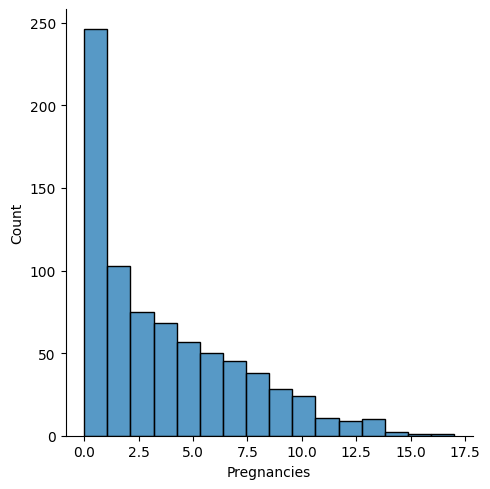

In [12]:
sns.displot(df['Pregnancies'],kind='hist')

<Axes: >

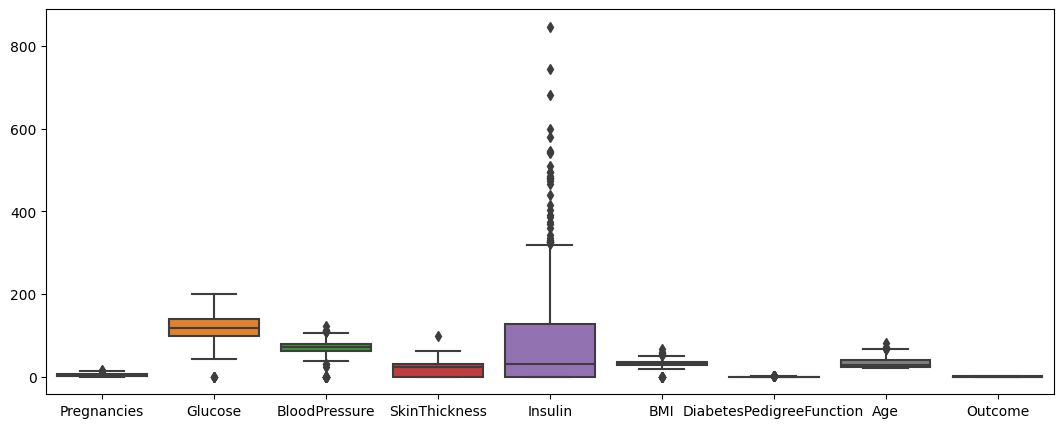

In [13]:
plt.figure(figsize=(13,5))
sns.boxplot(df)

<Axes: xlabel='Outcome'>

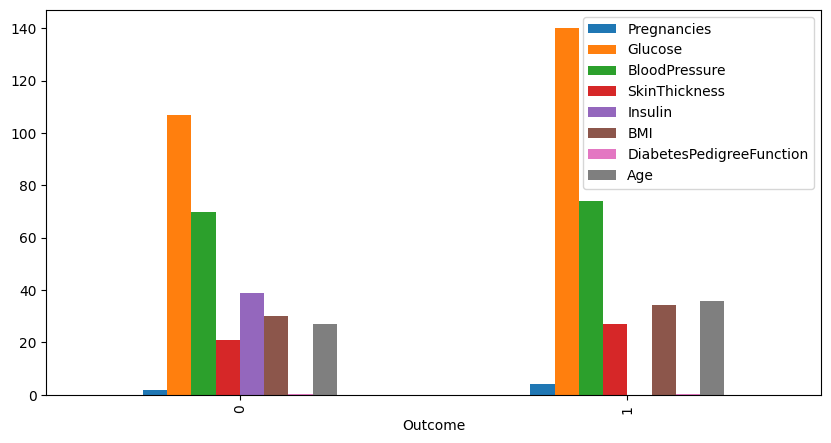

In [14]:
df.groupby(['Outcome']).median().sort_values('Age',ascending=True).plot.bar(figsize=(10,5))

<Axes: xlabel='Age', ylabel='count'>

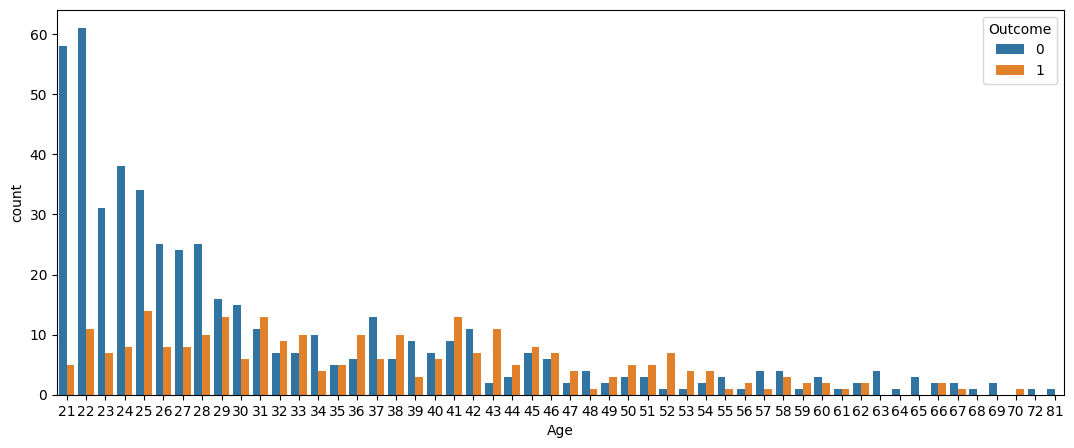

In [15]:
plt.figure(figsize=(13,5))
sns.countplot(data=df,x='Age',hue='Outcome')

In [16]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

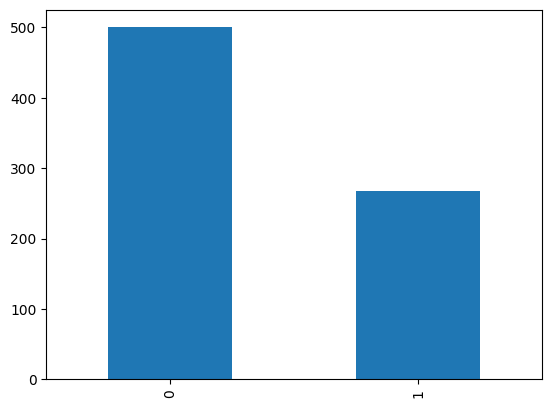

In [17]:
df.Outcome.value_counts().plot(kind='bar')

In [18]:
df.BMI.value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

<Axes: >

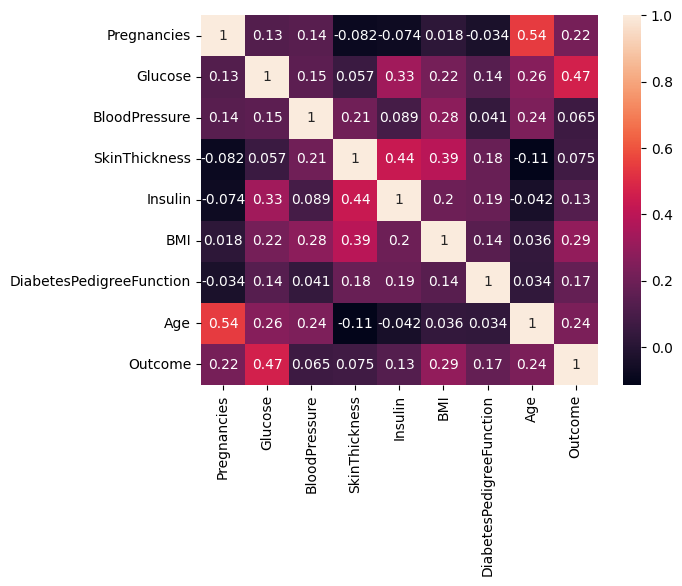

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preparing the data to build a model

In [21]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]

In [22]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#Splitting the data into train and test

In [24]:
# Split the dataset in to train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [26]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [27]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

# Building a Decision Tree Model

In [39]:
# building Decision tree classifier using gini

model=DecisionTreeClassifier(criterion='gini',max_depth=5)

model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5)

[Text(0.43617021276595747, 0.9166666666666666, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.17553191489361702, 0.75, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.0851063829787234, 0.5833333333333334, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0425531914893617, 0.4166666666666667, 'x[6] <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.02127659574468085, 0.25, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.06382978723404255, 0.25, 'x[6] <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.0425531914893617, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0851063829787234, 0.08333333333333333, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.1276595744680851, 0.4166666666666667, 'x[2] <= 37.0\ngini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.10638297872340426, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1489361702

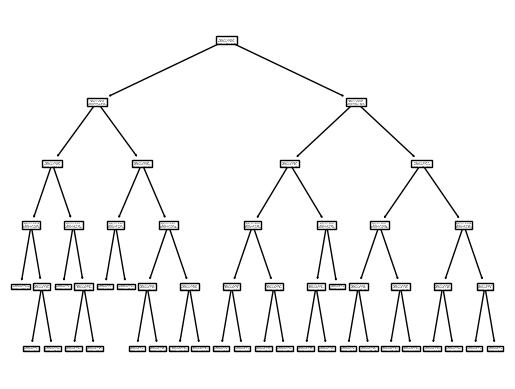

In [40]:
#Plot the decision tree

tree.plot_tree(model)

In [41]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

[Text(0.43617021276595747, 0.9166666666666666, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = Non-diabetic'),
 Text(0.17553191489361702, 0.75, 'Age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]\nclass = Non-diabetic'),
 Text(0.0851063829787234, 0.5833333333333334, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = Non-diabetic'),
 Text(0.0425531914893617, 0.4166666666666667, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = Non-diabetic'),
 Text(0.02127659574468085, 0.25, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]\nclass = Non-diabetic'),
 Text(0.06382978723404255, 0.25, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = Non-diabetic'),
 Text(0.0425531914893617, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Diabetic'),
 Text(0.0851063829787234, 0.08333333333333333, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = Non-dia

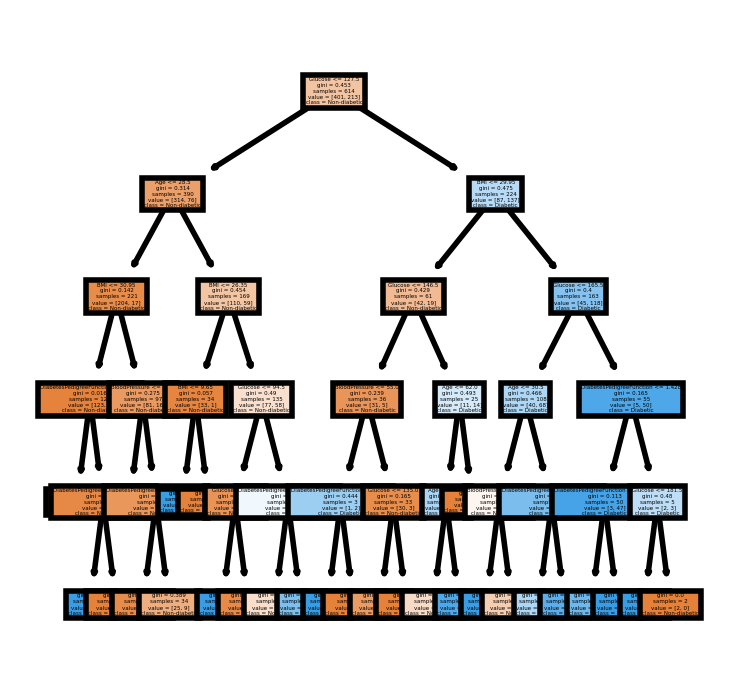

In [42]:
fn=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
cn=['Non-diabetic','Diabetic']

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=400)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [43]:
preds=model.predict(x_test)

In [44]:
pd.Series(preds).value_counts()

0    108
1     46
dtype: int64

In [45]:
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [46]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [47]:
pd.crosstab(y_test,preds)

col_0,0,1
Outcome,,
0,88,11
1,20,35


In [48]:
np.mean(preds==y_test)

0.7987012987012987

.Building a model using gini index gives 80% accuracy.